# Trees

In [1]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'b5cd02544',
 'commit_source': 'installation',
 'default_encoding': 'cp1252',
 'ipython_path': 'C:\\Users\\leona\\.anaconda\\conda\\Lib\\site-packages\\IPython',
 'ipython_version': '8.2.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.19045-SP0',
 'sys_executable': 'C:\\Users\\leona\\.anaconda\\conda\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit '
                '(AMD64)]'}


In [2]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Prediction

In [3]:
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [4]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [5]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


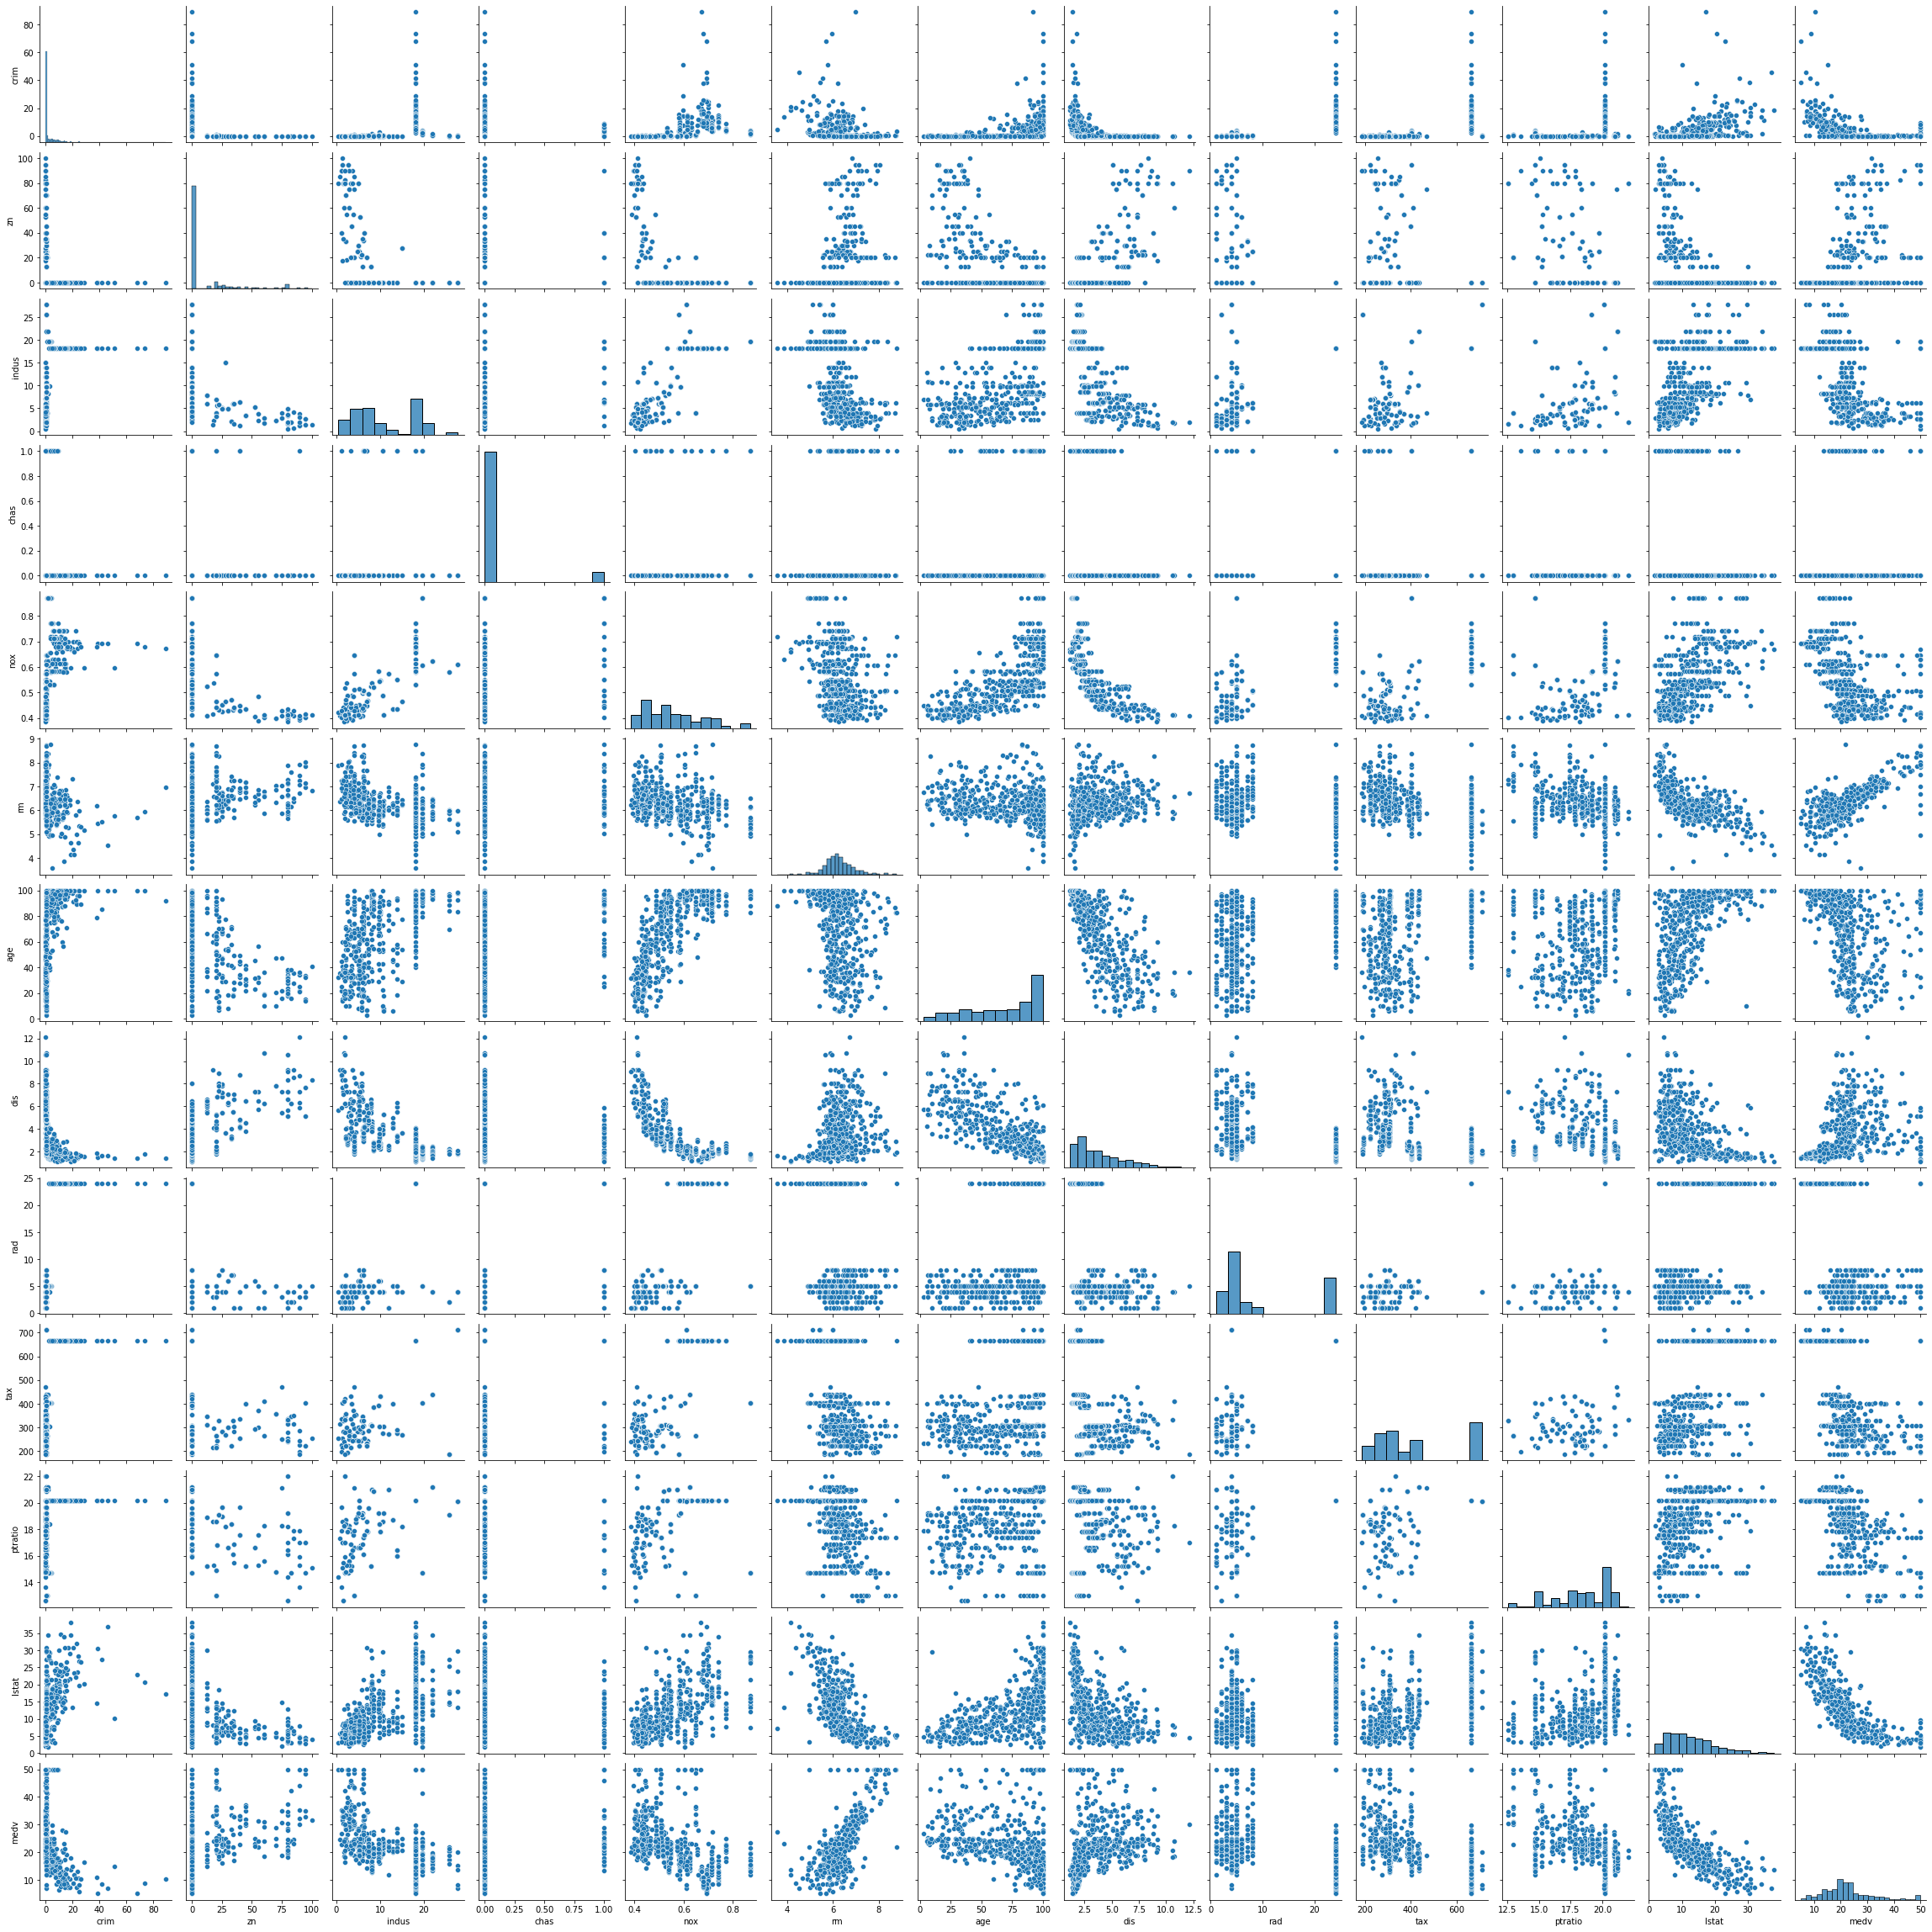

In [6]:
sns.pairplot(boston)

In [7]:
boston_other, boston_test = train_test_split(
  boston, 
  train_size = 0.5,
  random_state = 425, 
  )
print("Test size", boston_test.shape)
print("Train size", boston_other.shape)

Test size (253, 13)
Train size (253, 13)


In [8]:
X_other = boston_other.drop('medv', axis = 1)
y_other = boston_other.medv

X_test = boston_test.drop('medv', axis = 1)
y_test = boston_test.medv

### Regression Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

regtree = DecisionTreeRegressor(random_state = 425)

In [10]:
rt_pipe = Pipeline(steps = [
  ("model", regtree)
  ])
rt_pipe

Pipeline(steps=[('model', DecisionTreeRegressor(random_state=425))])

In [11]:
ccp_alpha_grid = np.linspace(start = -3, stop = 6, num = 100)
rt_tuned_parameters = {
  "model__ccp_alpha": ccp_alpha_grid
  }   
rt_tuned_parameters

{'model__ccp_alpha': array([-3.        , -2.90909091, -2.81818182, -2.72727273, -2.63636364,
        -2.54545455, -2.45454545, -2.36363636, -2.27272727, -2.18181818,
        -2.09090909, -2.        , -1.90909091, -1.81818182, -1.72727273,
        -1.63636364, -1.54545455, -1.45454545, -1.36363636, -1.27272727,
        -1.18181818, -1.09090909, -1.        , -0.90909091, -0.81818182,
        -0.72727273, -0.63636364, -0.54545455, -0.45454545, -0.36363636,
        -0.27272727, -0.18181818, -0.09090909,  0.        ,  0.09090909,
         0.18181818,  0.27272727,  0.36363636,  0.45454545,  0.54545455,
         0.63636364,  0.72727273,  0.81818182,  0.90909091,  1.        ,
         1.09090909,  1.18181818,  1.27272727,  1.36363636,  1.45454545,
         1.54545455,  1.63636364,  1.72727273,  1.81818182,  1.90909091,
         2.        ,  2.09090909,  2.18181818,  2.27272727,  2.36363636,
         2.45454545,  2.54545455,  2.63636364,  2.72727273,  2.81818182,
         2.90909091,  3.       

In [12]:
n_folds = 6
rt_search = GridSearchCV(
  rt_pipe,
  rt_tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  refit = True
  )            

In [13]:
rt_search.fit(X_other, y_other)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(random_state=425))]),
             param_grid={'model__ccp_alpha': array([-3.        , -2.90909091, -2.81818182, -2.72727273, -2.63636364,
       -2.54545455, -2.45454545, -2.36363636, -2.27272727, -2.18181818,
       -2.09090909, -2.        , -1.90909091, -1.81818182, -1.72727273,
       -1.63636364, -1.54545455, -1.45454545, -1.36363636, -1.2...
        2.90909091,  3.        ,  3.09090909,  3.18181818,  3.27272727,
        3.36363636,  3.45454545,  3.54545455,  3.63636364,  3.72727273,
        3.81818182,  3.90909091,  4.        ,  4.09090909,  4.18181818,
        4.27272727,  4.36363636,  4.45454545,  4.54545455,  4.63636364,
        4.72727273,  4.81818182,  4.90909091,  5.        ,  5.09090909,
        5.18181818,  5.27272727,  5.36363636,  5.45454545,  5.54545455,
        5.63636364,  5.72727273,  5.81818182,  5.90909091,  6.        ])},
             scoring='neg_root_mean_squared_error')

<Figure size 432x288 with 0 Axes>

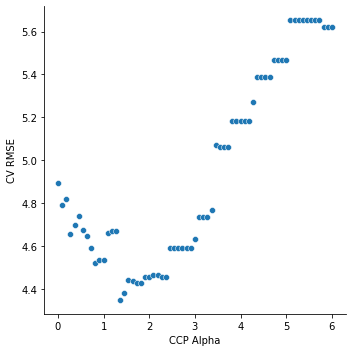

In [14]:
rt_cv_res = pd.DataFrame({
  "ccp_alpha": np.array(rt_search.cv_results_["param_model__ccp_alpha"]),
  "rmse": -rt_search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  data = rt_cv_res,
  x = "ccp_alpha",
  y = "rmse"
  ).set(
    xlabel = "CCP Alpha",
    ylabel = "CV RMSE"
);
plt.show()

In [15]:
rt_score = -rt_search.best_score_
rt_score

4.350231489362174

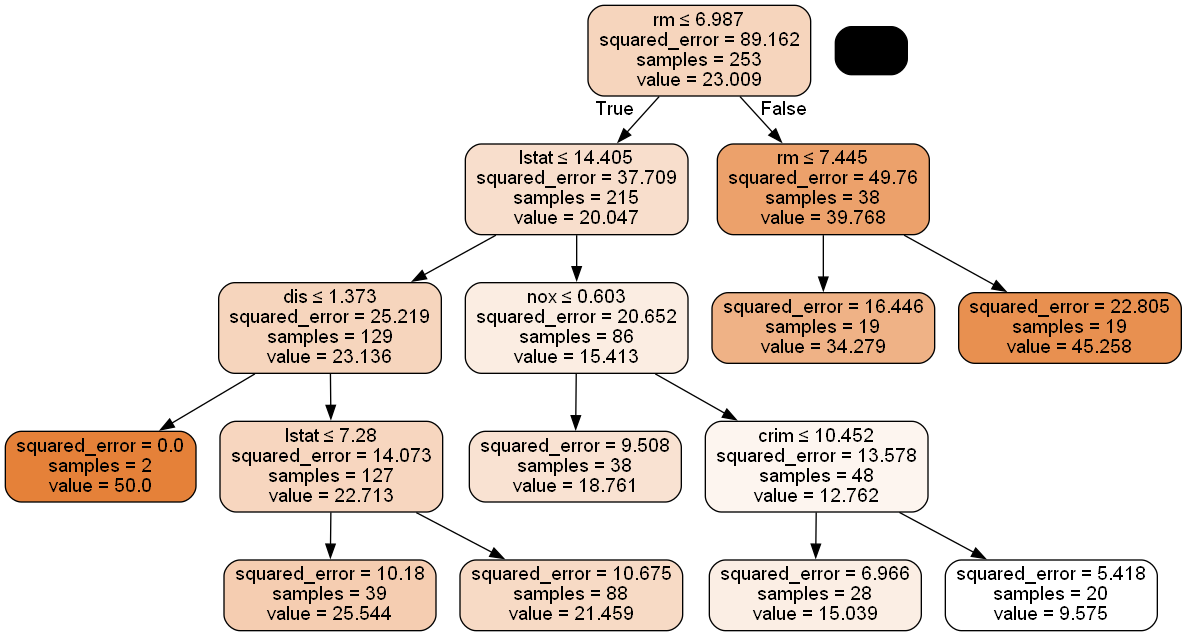

In [16]:
dot_data = export_graphviz(rt_search.best_estimator_['model'], out_file=None, feature_names=X_test.columns,
                                filled=True, rounded=True,
                                special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

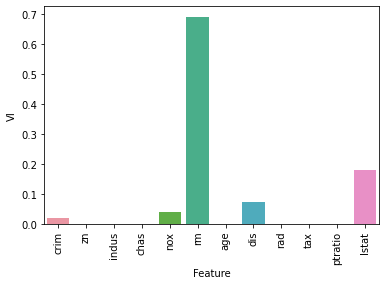

In [17]:
rt_vi_df = pd.DataFrame({
  "feature": X_other.columns,
  "vi": rt_search.best_estimator_['model'].feature_importances_
  })

plt.figure()
sns.barplot(
  data = rt_vi_df,
  x = "feature",
  y = "vi"
  ).set(
    xlabel = "Feature",
    ylabel = "VI"
);
plt.xticks(rotation = 90);
plt.show()

In [18]:
rt_mse = mean_squared_error(
  y_test, 
  rt_search.best_estimator_.predict(X_test), 
  squared = False
  )
rt_mse

4.60836412742039

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf =  RandomForestRegressor(
  n_estimators = 100, 
  criterion = 'squared_error',
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

In [20]:
rf_pipe = Pipeline(steps = [
  ("model", rf)
  ])
rf_pipe

Pipeline(steps=[('model',
                 RandomForestRegressor(max_features='sqrt', oob_score=True,
                                       random_state=425))])

In [21]:
B_grid = np.linspace(start = 75, stop = 200, num = 30, dtype=int) 
m_grid = ['sqrt', 'log2', 1.0] 
rf_tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }
rf_tuned_parameters 

{'model__n_estimators': array([ 75,  79,  83,  87,  92,  96, 100, 105, 109, 113, 118, 122, 126,
        131, 135, 139, 143, 148, 152, 156, 161, 165, 169, 174, 178, 182,
        187, 191, 195, 200]),
 'model__max_features': ['sqrt', 'log2', 1.0]}

In [22]:
n_folds = 6
rf_search = GridSearchCV(
  rf_pipe,
  rf_tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  refit = True
  )

In [23]:
rf_search.fit(X_other, y_other)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(max_features='sqrt',
                                                              oob_score=True,
                                                              random_state=425))]),
             param_grid={'model__max_features': ['sqrt', 'log2', 1.0],
                         'model__n_estimators': array([ 75,  79,  83,  87,  92,  96, 100, 105, 109, 113, 118, 122, 126,
       131, 135, 139, 143, 148, 152, 156, 161, 165, 169, 174, 178, 182,
       187, 191, 195, 200])},
             scoring='neg_root_mean_squared_error')

<Figure size 432x288 with 0 Axes>

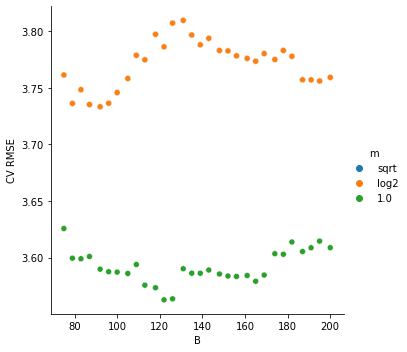

In [24]:
rf_cv_res = pd.DataFrame({
  "B": np.array(rf_search.cv_results_["param_model__n_estimators"]),
  "rmse": -rf_search.cv_results_["mean_test_score"],
  "m": rf_search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  data = rf_cv_res,
  x = "B",
  y = "rmse",
  hue = "m",
  ).set(
    xlabel = "B",
    ylabel = "CV RMSE"
);
plt.show()  

In [25]:
rf_score = -rf_search.best_score_
rf_score

3.562786071893901

In [26]:
rf_search.best_estimator_

Pipeline(steps=[('model',
                 RandomForestRegressor(n_estimators=122, oob_score=True,
                                       random_state=425))])

<Figure size 432x288 with 0 Axes>

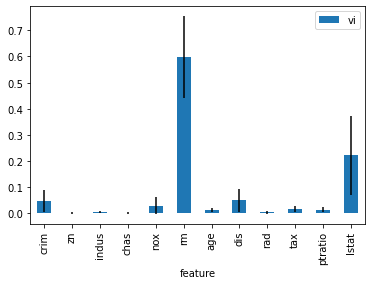

In [27]:
rf_vi_df = pd.DataFrame({
  "feature": X_other.columns,
  "vi": rf_search.best_estimator_['model'].feature_importances_,
  "vi_std": np.std([tree.feature_importances_ for tree in rf_search.best_estimator_['model'].estimators_], axis = 0)
  })

plt.figure()
rf_vi_df.plot.bar(x = "feature", y = "vi", yerr = "vi_std")
plt.xticks(rotation = 90);
plt.show()

In [28]:
rf_mse = mean_squared_error(
  y_test, 
  rf_search.best_estimator_.predict(X_test), 
  squared = False
  )
rf_mse

3.6254629999234527

### Boosting

In [29]:
from sklearn.ensemble import AdaBoostRegressor

bst = AdaBoostRegressor(
  estimator=DecisionTreeRegressor(max_depth=3),
  n_estimators=50, 
  learning_rate=1.0,
  random_state=425
  )

In [30]:
bst_pipe = Pipeline(steps = [
  ("model", bst)
  ])
bst_pipe

Pipeline(steps=[('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                   random_state=425))])

In [31]:
d_grid = [
  DecisionTreeRegressor(max_depth = 1),
  DecisionTreeRegressor(max_depth = 2),
  DecisionTreeRegressor(max_depth = 3),
  DecisionTreeRegressor(max_depth = 4)
  ]
B_grid = np.linspace(start = 30, stop = 200, num = 20, dtype=int) 
lambda_grid = np.linspace(start = 0, stop = 1, num = 6) 
bst_tuned_parameters = {
  "model__estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }
bst_tuned_parameters 

{'model__estimator': [DecisionTreeRegressor(max_depth=1),
  DecisionTreeRegressor(max_depth=2),
  DecisionTreeRegressor(max_depth=3),
  DecisionTreeRegressor(max_depth=4)],
 'model__n_estimators': array([ 30,  38,  47,  56,  65,  74,  83,  92, 101, 110, 119, 128, 137,
        146, 155, 164, 173, 182, 191, 200]),
 'model__learning_rate': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])}

In [32]:
n_folds = 6
bst_search = GridSearchCV(
  bst_pipe,
  bst_tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  refit = True
  )

In [33]:
bst_search.fit(X_other, y_other)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                                          random_state=425))]),
             param_grid={'model__estimator': [DecisionTreeRegressor(max_depth=1),
                                              DecisionTreeRegressor(max_depth=2),
                                              DecisionTreeRegressor(max_depth=3),
                                              DecisionTreeRegressor(max_depth=4)],
                         'model__learning_rate': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'model__n_estimators': array([ 30,  38,  47,  56,  65,  74,  83,  92, 101, 110, 119, 128, 137,
       146, 155, 164, 173, 182, 191, 200])},
             scoring='neg_root_mean_squared_error')

<Figure size 432x288 with 0 Axes>

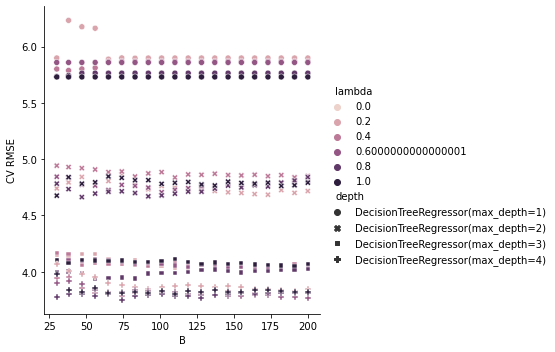

In [34]:
bst_cv_res = pd.DataFrame({
  "B": np.array(bst_search.cv_results_["param_model__n_estimators"]),
  "rmse": -bst_search.cv_results_["mean_test_score"],
  "lambda": bst_search.cv_results_["param_model__learning_rate"],
  "depth": bst_search.cv_results_["param_model__estimator"],
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = bst_cv_res,
  x = "B",
  y = "rmse",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "B",
    ylabel = "CV RMSE"
);
plt.show()

In [35]:
-bst_search.best_score_

3.751078908350228

In [36]:
bst_search.best_estimator_

Pipeline(steps=[('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                   learning_rate=0.8, n_estimators=74,
                                   random_state=425))])

In [37]:
bst_mse = mean_squared_error(
  y_test, 
  bst_search.best_estimator_.predict(X_test), 
  squared = False
  )
bst_mse

3.5003056435605924

## Classification

In [38]:
### classifying Sales <= 8 versus Sales > 8

In [39]:
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Carseats.csv"
s = requests.get(url).content
cars = pd.read_csv(io.StringIO(s.decode('utf-8')))
cars

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
cars.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [41]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


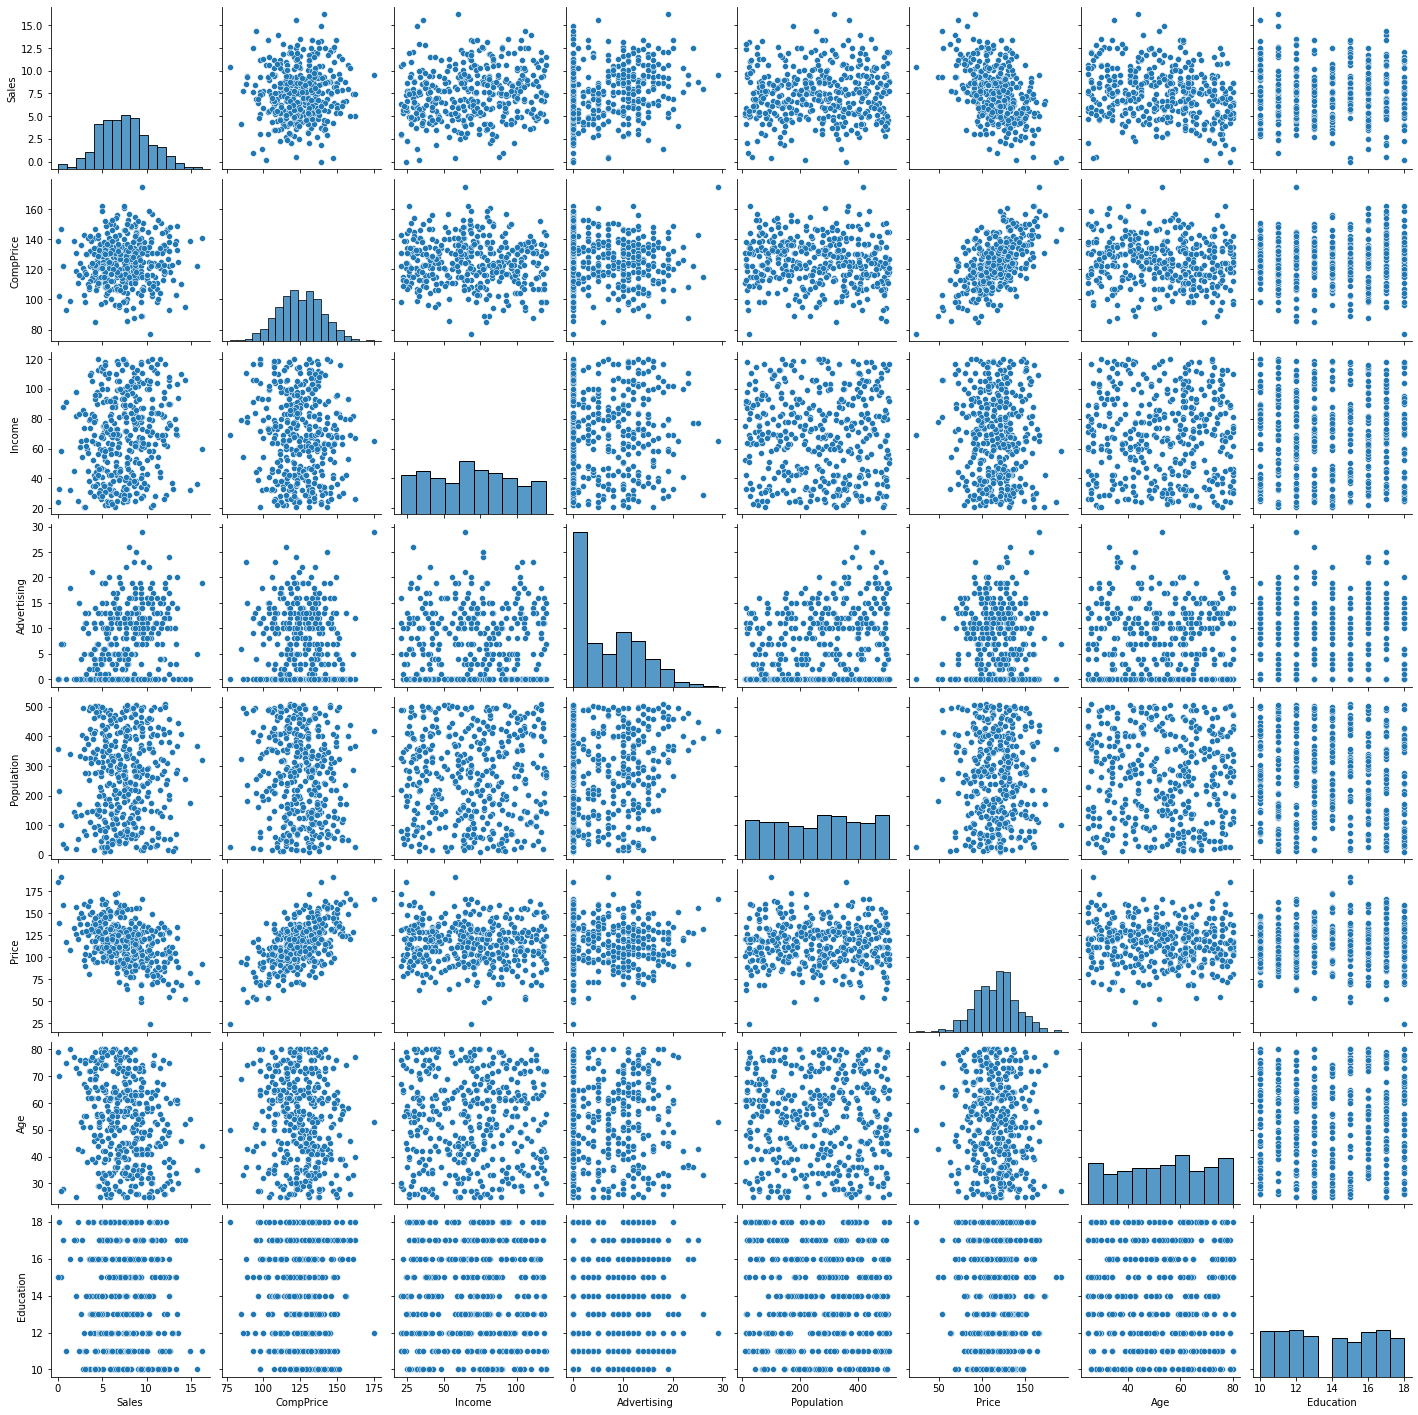

In [42]:
sns.pairplot(cars)

In [43]:
cars.loc[cars['Sales'] <= 8, 'Sales'] = 0
cars.loc[cars['Sales'] > 8, 'Sales'] = 1
cars.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No


In [44]:
cars_other, cars_test = train_test_split(
  cars, 
  train_size = 0.75,
  random_state = 425,
  stratify = cars.Sales
  )
cars_test.shape

(100, 11)

In [45]:
cars_other.shape

(300, 11)

In [46]:
num_features = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
cat_features = ['ShelveLoc', 'Urban', 'US']
features = np.concatenate([num_features, cat_features])

X_other = cars_other[features]
y_other = cars_other.Sales

X_test = cars_test[features]
y_test = cars_test.Sales

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

categorical_tf = Pipeline(steps = [
    ('encoder', OneHotEncoder())
])

col_tf = ColumnTransformer(transformers = [
    ('cat', categorical_tf,  cat_features)], 
                           remainder = 'passthrough')

### Classification Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classtree = DecisionTreeClassifier(
  criterion = 'gini',
  random_state = 425
  )

In [49]:
ct_pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", classtree)
  ])
ct_pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model', DecisionTreeClassifier(random_state=425))])

In [50]:
ct_ccp_alpha_grid = np.linspace(start = 0.0, stop = 0.1, num = 100)
ct_tuned_parameters = {
  "model__ccp_alpha": ct_ccp_alpha_grid
  }
ct_tuned_parameters 

{'model__ccp_alpha': array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
        0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
        0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
        0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
        0.02020202, 0.02121212, 0.02222222, 0.02323232, 0.02424242,
        0.02525253, 0.02626263, 0.02727273, 0.02828283, 0.02929293,
        0.03030303, 0.03131313, 0.03232323, 0.03333333, 0.03434343,
        0.03535354, 0.03636364, 0.03737374, 0.03838384, 0.03939394,
        0.04040404, 0.04141414, 0.04242424, 0.04343434, 0.04444444,
        0.04545455, 0.04646465, 0.04747475, 0.04848485, 0.04949495,
        0.05050505, 0.05151515, 0.05252525, 0.05353535, 0.05454545,
        0.05555556, 0.05656566, 0.05757576, 0.05858586, 0.05959596,
        0.06060606, 0.06161616, 0.06262626, 0.06363636, 0.06464646,
        0.06565657, 0.06666667, 0.06767677, 0.06868687, 0.06969697,
        0.07070707, 0.071717

In [51]:
n_folds = 6
ct_search = GridSearchCV(
  ct_pipe,
  ct_tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  refit = True
  )

In [52]:
ct_search.fit(X_other, y_other)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['ShelveLoc',
                                                                          'Urban',
                                                                          'US'])])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=425))]),
             param_grid={'model__ccp_alpha': array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
       0.00505051, 0.00606061,...
       0.06565657, 0.06666667, 0.06767677, 0.06868687, 0.06969697,
       0.07070707, 0.07171717, 0.07272727, 0.07373737, 0.07474747,
       0.07575758, 0.07676768, 0.07777778, 0.07878788, 0.07979798,
       0.08080808, 0.08181818, 0.08282828, 0.08383838, 0.08484848,
       0.08585859, 0.08686869, 0.08787879, 0.08888889, 0.08989899,
       0.09090909, 0.09191919, 0.09292929, 0.09393939, 0.09494949,
       0.0959596 , 0.0969697 , 0.0979798 , 0.0989899 , 0.1       ])},
             scoring='roc_auc')

<Figure size 432x288 with 0 Axes>

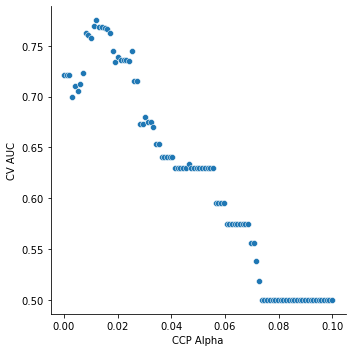

In [53]:
ct_cv_res = pd.DataFrame({
  "ccp_alpha": np.array(ct_search.cv_results_["param_model__ccp_alpha"]),
  "auc": ct_search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  data = ct_cv_res,
  x = "ccp_alpha",
  y = "auc"
  ).set(
    xlabel = "CCP Alpha",
    ylabel = "CV AUC"
);
plt.show()

In [54]:
ct_score = ct_search.best_score_
ct_score

0.7750458401751504

In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score

ct_accuracy = accuracy_score(
  y_other,
  ct_search.best_estimator_.predict(X_other)
  )
ct_accuracy

0.8233333333333334

In [56]:
ct_search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.012121212121212121,
                                        random_state=425))])

In [57]:
features = np.concatenate([
    features[:-3], 
    ['ShelveLoc:Bad', 'ShelveLoc:Good', 'ShelveLoc:Medium'],
    ['Urban:No', 'Urban:Yes'],
    ['US:No', 'US:Yes']
])

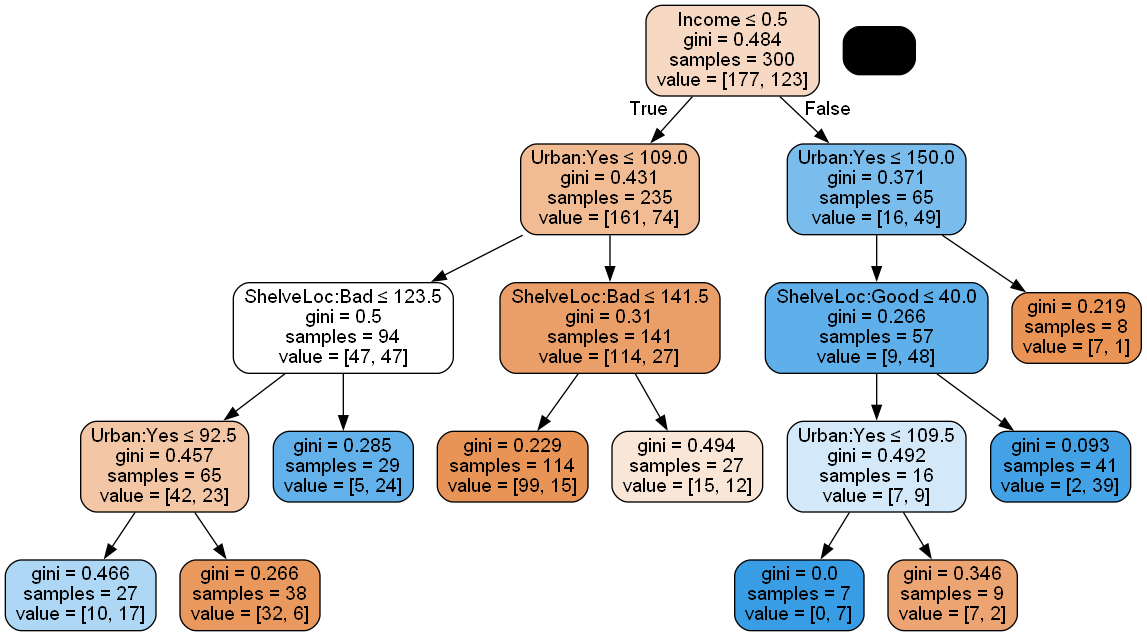

In [58]:
dot_data = export_graphviz(ct_search.best_estimator_['model'], out_file=None, feature_names=features,
                                filled=True, rounded=True,
                                special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

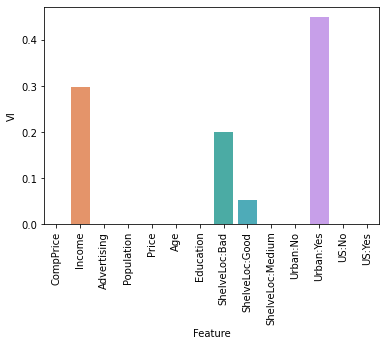

In [59]:
ct_vi_df = pd.DataFrame({
  "feature": features,
  "vi": ct_search.best_estimator_['model'].feature_importances_
  })

plt.figure()
sns.barplot(
  data = ct_vi_df,
  x = "feature",
  y = "vi"
  ).set(
    xlabel = "Feature",
    ylabel = "VI"
);
plt.xticks(rotation = 90);
plt.show()

In [60]:
roc_auc_score(
  y_test,
  ct_search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.7488631665977676

In [61]:
accuracy_score(
  y_test, 
  ct_search.best_estimator_.predict(X_test)
  )

0.75

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
  n_estimators = 100, 
  criterion = 'gini',
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

In [63]:
rfc_pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", rfc)
  ])
rfc_pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 RandomForestClassifier(oob_score=True, random_state=425))])

In [64]:
B_grid = np.linspace(start = 50, stop = 350, num = 30, dtype=int) 
m_grid = ['sqrt', 'log2', 1.0] 
rfc_tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }
rfc_tuned_parameters 

{'model__n_estimators': array([ 50,  60,  70,  81,  91, 101, 112, 122, 132, 143, 153, 163, 174,
        184, 194, 205, 215, 225, 236, 246, 256, 267, 277, 287, 298, 308,
        318, 329, 339, 350]),
 'model__max_features': ['sqrt', 'log2', 1.0]}

In [65]:
n_folds = 6
rfc_search = GridSearchCV(
  rfc_pipe,
  rfc_tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  refit = True
  )

In [66]:
rfc_search.fit(X_other, y_other)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['ShelveLoc',
                                                                          'Urban',
                                                                          'US'])])),
                                       ('model',
                                        RandomForestClassifier(oob_score=True,
                                                               random_state=425))]),
             param_grid={'model__max_features': ['sqrt', 'log2', 1.0],
                         'model__n_estimators': array([ 50,  60,  70,  81,  91, 101, 112, 122, 132, 143, 153, 163, 174,
       184, 194, 205, 215, 225, 236, 246, 256, 267, 277, 287, 298, 308,
       318, 329, 339, 350])},
             scoring='roc_auc')

<Figure size 432x288 with 0 Axes>

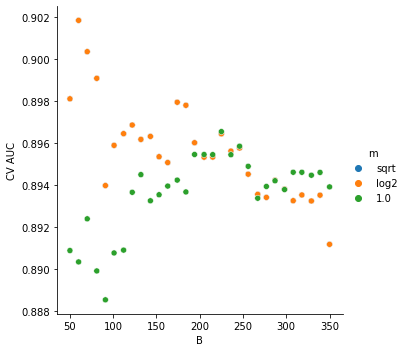

In [67]:
rfc_cv_res = pd.DataFrame({
  "B": np.array(rfc_search.cv_results_["param_model__n_estimators"]),
  "auc": rfc_search.cv_results_["mean_test_score"],
  "m": rfc_search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  data = rfc_cv_res,
  x = "B",
  y = "auc",
  hue = "m"
  ).set(
    xlabel = "B",
    ylabel = "CV AUC"
);
plt.show()

In [68]:
rfc_score = rfc_search.best_score_
rfc_score

0.9018479748221128

In [69]:
rfc_accuracy = accuracy_score(
  y_other,
  rfc_search.best_estimator_.predict(X_other)
  )
rfc_accuracy

1.0

In [70]:
rfc_search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 RandomForestClassifier(n_estimators=60, oob_score=True,
                                        random_state=425))])

<Figure size 432x288 with 0 Axes>

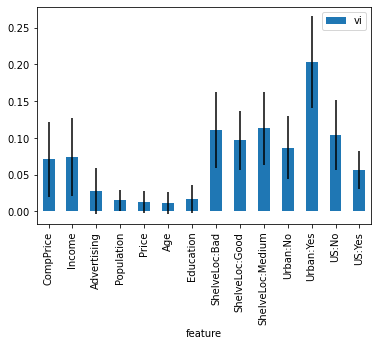

In [71]:
rfc_vi_df = pd.DataFrame({
  "feature": features,
  "vi": rfc_search.best_estimator_['model'].feature_importances_,
  "vi_std": np.std([tree.feature_importances_ for tree in rfc_search.best_estimator_['model'].estimators_], axis = 0)
  })

plt.figure()
rfc_vi_df.plot.bar(x = "feature", y = "vi", yerr = "vi_std")
plt.xticks(rotation = 90);
plt.show()

In [72]:
roc_auc_score(
  y_test,
  rfc_search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.9257957833815627

In [73]:
accuracy_score(
  y_test,
  rfc_search.best_estimator_.predict(X_test)
  )

0.84

### Boosting

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bstc = AdaBoostClassifier(
  estimator = DecisionTreeClassifier(max_depth = 3),
  n_estimators = 50, 
  learning_rate = 1.0,
  random_state = 425
  )

In [75]:
bstc_pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", bstc)
  ])
bstc_pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                    random_state=425))])

In [76]:
d_grid = [
  DecisionTreeClassifier(max_depth = 1),
  DecisionTreeClassifier(max_depth = 2),
  DecisionTreeClassifier(max_depth = 3),
  DecisionTreeClassifier(max_depth = 4)
  ]
B_grid = np.linspace(start = 30, stop = 200, num = 20, dtype=int) 
lambda_grid = np.linspace(start = 0, stop = 1, num = 6) 
bstc_tuned_parameters = {
  "model__estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }
bstc_tuned_parameters 

{'model__estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=4)],
 'model__n_estimators': array([ 30,  38,  47,  56,  65,  74,  83,  92, 101, 110, 119, 128, 137,
        146, 155, 164, 173, 182, 191, 200]),
 'model__learning_rate': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])}

In [77]:
n_folds = 6
bstc_search = GridSearchCV(
  bstc_pipe,
  bstc_tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  refit = True
  )

In [78]:
bstc_search.fit(X_other, y_other)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['ShelveLoc',
                                                                          'Urban',
                                                                          'US'])])),
                                       ('model',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                                           random_state=425))]),
             param_grid={'model__estimator': [DecisionTreeClassifier(max_depth=1),
                                              DecisionTreeClassifier(max_depth=2),
                                              DecisionTreeClassifier(max_depth=3),
                                              DecisionTreeClassifier(max_depth=4)],
                         'model__learning_rate': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'model__n_estimators': array([ 30,  38,  47,  56,  65,  74,  83,  92, 101, 110, 119, 128, 137,
       146, 155, 164, 173, 182, 191, 200])},
             scoring='roc_auc')

<Figure size 432x288 with 0 Axes>

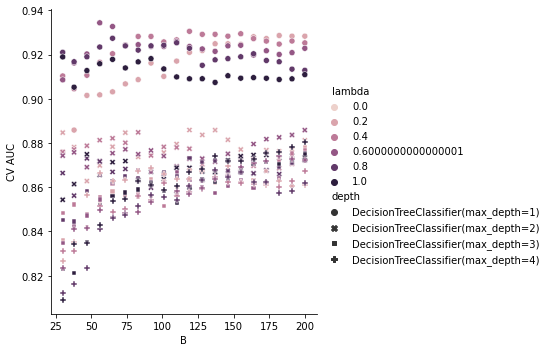

In [79]:
bstc_cv_res = pd.DataFrame({
  "B": np.array(bstc_search.cv_results_["param_model__n_estimators"]),
  "auc": bstc_search.cv_results_["mean_test_score"],
  "lambda": bstc_search.cv_results_["param_model__learning_rate"],
  "depth": bstc_search.cv_results_["param_model__estimator"],
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = bstc_cv_res,
  x = "B",
  y = "auc",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "B",
    ylabel = "CV AUC"
);
plt.show()

In [80]:
bstc_score = bstc_search.best_score_
bstc_score

0.9343609742747674

In [81]:
bstc_accuracy = accuracy_score(
  y_other,
  bstc_search.best_estimator_.predict(X_other)
  )
bstc_accuracy

0.9433333333333334

In [82]:
bstc_search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=0.6000000000000001,
                                    n_estimators=56, random_state=425))])

In [83]:
roc_auc_score(
  y_test,
  bstc_search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.9661016949152543

In [84]:
accuracy_score(
  y_test,
  bstc_search.best_estimator_.predict(X_test)
  )

0.92